In [4]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1 style="text-align: center;">Lesson 11-2: Pandas</h1>

Ở bài trước, chúng ta đã biết pandas là gì, cách cài đặt, những khái niệm cơ bản trong pandas như dataFrame, Series,... và một số thao tác xử lí cơ bản. Hãy cùng đi vào một số thao tác nâng cao hơn

In [167]:
import pandas as pd

transactions = pd.read_csv('./data/Cafe-Transaction-Store.csv')
transactions["REVENUE"] = (transactions["PRICE"] * transactions["QUANTITY"])
transactions['CALENDAR_DATE'] = pd.to_datetime(transactions['CALENDAR_DATE'])
transactions.insert(2,'YEAR',transactions["CALENDAR_DATE"].dt.year,allow_duplicates=True)
transactions.insert(3,'MONTH',transactions["CALENDAR_DATE"].dt.month,allow_duplicates=True)
transactions.insert(4,'DAY',transactions["CALENDAR_DATE"].dt.day, allow_duplicates=True)
transactions.insert(5,'DAYOFWEEK',transactions["CALENDAR_DATE"].dt.day_name())
transactions

,CALENDAR_DATE,PRICE,YEAR,MONTH,DAY,DAYOFWEEK,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
0,2012-01-01,15.50,2012,1,1,Sunday,46,1070,0,713.00
1,2012-01-01,12.73,2012,1,1,Sunday,22,2051,2,280.06
2,2012-01-01,12.75,2012,1,1,Sunday,18,2052,2,229.50
3,2012-01-01,12.60,2012,1,1,Sunday,30,2053,2,378.00
4,2012-01-02,15.50,2012,1,2,Monday,70,1070,0,1085.00
...,...,...,...,...,...,...,...,...,...,...
5387,2015-09-09,11.26,2015,9,9,Wednesday,54,2053,2,608.04
5388,2015-09-10,14.50,2015,9,10,Thursday,96,1070,0,1392.00
5389,2015-09-10,12.19,2015,9,10,Thursday,30,2051,2,365.70
5390,2015-09-10,11.50,2015,9,10,Thursday,18,2052,2,207.00


## Group by

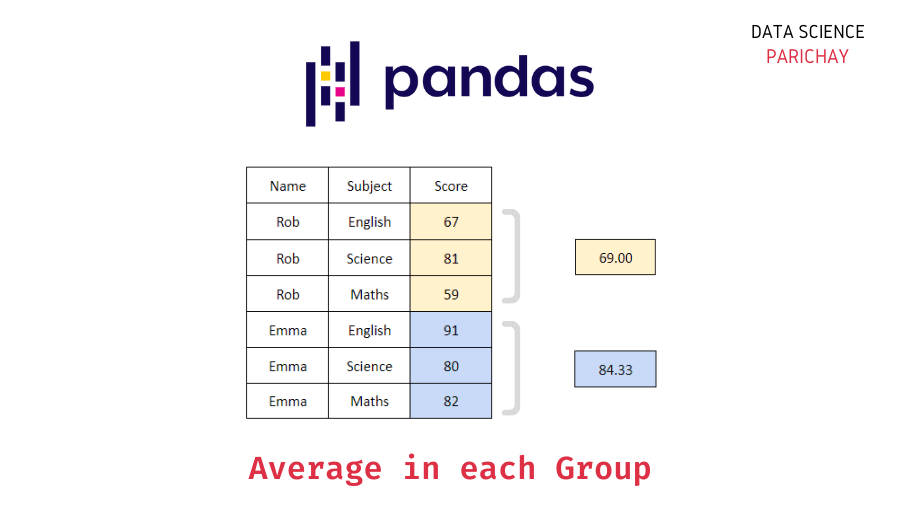

Về cơ bản, với Pandas groupby, chúng ta có thể chia dữ liệu Pandas thành các nhóm nhỏ hơn bằng cách sử dụng một hoặc nhiều biến

Ví dụ: Với bộ dữ liệu giao dịch trên, ta cần tính doanh thu cho từng ngày. Như vậy ta sẽ phải gộp các ngày giống nhau ở cột CALENAR_DAY và tính tổng ở cột REVENUE

In [168]:
# Tổng doanh thu cho từng ngày
transactions.groupby(['CALENDAR_DATE'])["REVENUE"].sum()

CALENDAR_DATE
2012-01-01    1600.56
2012-01-02    1997.46
2012-01-03    1797.78
2012-01-04    2530.18
2012-01-05    3107.08
               ...   
2015-09-06    2660.12
2015-09-07    2652.84
2015-09-08    2532.70
2015-09-09    2621.50
2015-09-10    2527.70
Name: REVENUE, Length: 1348, dtype: float64

Nếu cần tính trung bình ta sử dụng hàm mean()

In [17]:
# Doanh thu trung bình của từng ngày
transactions.groupby(['CALENDAR_DATE'])["REVENUE"].mean()


CALENDAR_DATE
01/01/12    400.140
01/01/13    455.850
01/01/14    547.855
01/01/15    454.720
01/02/12    499.365
             ...   
12/30/13    780.445
12/30/14    625.980
12/31/12    770.540
12/31/13    754.305
12/31/14    648.280
Name: REVENUE, Length: 1348, dtype: float64

Dưới đây sẽ là tóm tắc công dụng của 13 chức năng tổng hợp có sẵn trong Pandas:

- mean(): Tính trung bình của các nhóm
- sum(): Tính tổng các giá trị của nhóm
- size(): Tính kích thước nhóm
- count(): Tính toán số lượng nhóm
- std(): Độ lệch chuẩn của các nhóm
- var(): Tính toán phương sai của các nhóm
- sem(): Sai số chuẩn của giá trị trung bình của các nhóm
- describe(): Tạo thống kê mô tả
- first(): Tính toán giá trị đầu tiên của nhóm
- last(): Tính giá trị cuối cùng của nhóm
- nth(): Lấy giá trị thứ n hoặc một tập hợp con nếu n là một danh sách
- min(): Tính toán giá trị nhỏ nhất nhóm
- max(): Tính toán giá trị lớn nhất nhóm

In [170]:
# Hãy tính tổng doanh thu cho từng mã sản phẩm
transactions.groupby(['SELL_ID'])["REVENUE"].sum()

# Hãy tìm tổng số sản phẩm bán được cho mỗi sản phẩm
transactions.groupby(['SELL_ID'])["QUANTITY"].sum()


SELL_ID
1070    1660091.00
2051     483225.68
2052     331591.36
2053     736317.58
Name: REVENUE, dtype: float64

SELL_ID
1070    109834
2051     39184
2052     27842
2053     62204
Name: QUANTITY, dtype: int64

## Pivot

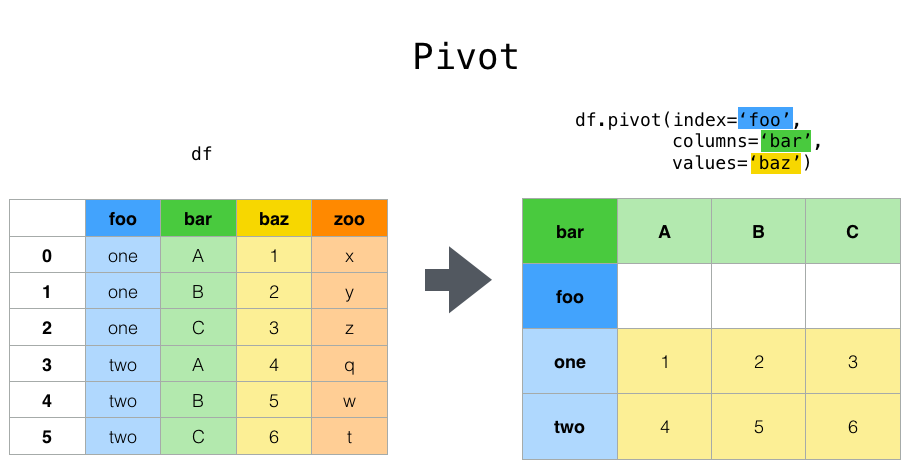

Pivot dùng để định dạng lại dữ liệu. Chuyển từ bảng dài thành bảng rộng

In [171]:
year_sell_id = transactions.groupby(["YEAR","SELL_ID"])["REVENUE"].mean()
year_sell_id

YEAR  SELL_ID
2012  1070       1222.493151
      2051        357.116932
      2052        240.685315
      2053        545.080110
2013  1070       1241.273973
      2051        362.497041
      2052        245.881425
      2053        550.652055
2014  1070       1236.649315
      2051        359.179288
      2052        250.229260
      2053        546.680877
2015  1070       1223.079051
      2051        353.621107
      2052        247.671225
      2053        540.856996
Name: REVENUE, dtype: float64

In [175]:
pivot = transactions.pivot_table(index='SELL_ID',columns="YEAR", values="REVENUE", aggfunc="sum")
pivot

YEAR,2012,2013,2014,2015
SELL_ID,,,,
1070,446210.00,453065.00,451377.00,309439.00
2051,130347.68,132311.42,131100.44,89466.14
2052,87850.14,89746.72,91333.68,62660.82
2053,198954.24,200988.00,199538.52,136836.82


## Melt

Melt là phương thức ngược lại với pivot(). Dùng để chuyển bảng dạng rộng sang dạng dài

In [104]:
pivot.melt(id_vars= "SELL_ID", value_name="REVENUE")

,SELL_ID,YEAR,REVENUE
0,1070,2012,1222.493151
1,2051,2012,357.116932
2,2052,2012,240.685315
3,2053,2012,545.080110
4,1070,2013,1241.273973
5,2051,2013,362.497041
6,2052,2013,245.881425
7,2053,2013,550.652055
8,1070,2014,1236.649315
9,2051,2014,359.179288


## Concat

Nối các dataFrame theo một trục cụ thể

axis = 0 => nối theo index

axis = 1 => nối theo columns

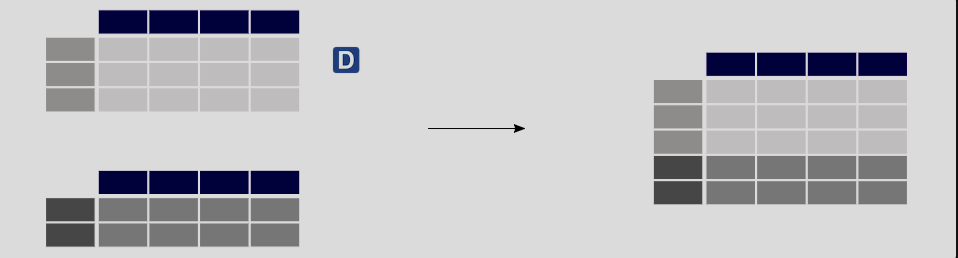

In [176]:
head_10 = transactions.head(10)
head_10
tail_10 = transactions.tail(10)
tail_10

,CALENDAR_DATE,PRICE,YEAR,MONTH,DAY,DAYOFWEEK,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
0,2012-01-01,15.50,2012,1,1,Sunday,46,1070,0,713.00
1,2012-01-01,12.73,2012,1,1,Sunday,22,2051,2,280.06
2,2012-01-01,12.75,2012,1,1,Sunday,18,2052,2,229.50
3,2012-01-01,12.60,2012,1,1,Sunday,30,2053,2,378.00
4,2012-01-02,15.50,2012,1,2,Monday,70,1070,0,1085.00
5,2012-01-02,12.73,2012,1,2,Monday,22,2051,2,280.06
6,2012-01-02,12.75,2012,1,2,Monday,16,2052,2,204.00
7,2012-01-02,12.60,2012,1,2,Monday,34,2053,2,428.40
8,2012-01-03,15.50,2012,1,3,Tuesday,62,1070,0,961.00
9,2012-01-03,12.73,2012,1,3,Tuesday,26,2051,2,330.98


,CALENDAR_DATE,PRICE,YEAR,MONTH,DAY,DAYOFWEEK,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
5382,2015-09-08,11.50,2015,9,8,Tuesday,26,2052,2,299.00
5383,2015-09-08,11.26,2015,9,8,Tuesday,50,2053,2,563.00
5384,2015-09-09,14.50,2015,9,9,Wednesday,96,1070,0,1392.00
5385,2015-09-09,12.19,2015,9,9,Wednesday,34,2051,2,414.46
5386,2015-09-09,11.50,2015,9,9,Wednesday,18,2052,2,207.00
5387,2015-09-09,11.26,2015,9,9,Wednesday,54,2053,2,608.04
5388,2015-09-10,14.50,2015,9,10,Thursday,96,1070,0,1392.00
5389,2015-09-10,12.19,2015,9,10,Thursday,30,2051,2,365.70
5390,2015-09-10,11.50,2015,9,10,Thursday,18,2052,2,207.00
5391,2015-09-10,11.26,2015,9,10,Thursday,50,2053,2,563.00


In [177]:
pd.concat([head_10, tail_10],axis=0)

,CALENDAR_DATE,PRICE,YEAR,MONTH,DAY,DAYOFWEEK,QUANTITY,SELL_ID,SELL_CATEGORY,REVENUE
0,2012-01-01,15.50,2012,1,1,Sunday,46,1070,0,713.00
1,2012-01-01,12.73,2012,1,1,Sunday,22,2051,2,280.06
2,2012-01-01,12.75,2012,1,1,Sunday,18,2052,2,229.50
3,2012-01-01,12.60,2012,1,1,Sunday,30,2053,2,378.00
4,2012-01-02,15.50,2012,1,2,Monday,70,1070,0,1085.00
5,2012-01-02,12.73,2012,1,2,Monday,22,2051,2,280.06
6,2012-01-02,12.75,2012,1,2,Monday,16,2052,2,204.00
7,2012-01-02,12.60,2012,1,2,Monday,34,2053,2,428.40
8,2012-01-03,15.50,2012,1,3,Tuesday,62,1070,0,961.00
9,2012-01-03,12.73,2012,1,3,Tuesday,26,2051,2,330.98


In [122]:
sold = pd.read_csv('./Data/Cafe-Sell-Meta-Data.csv')
sold

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER
5,2051,2,5030,COKE
6,2052,2,7821,BURGER
7,2052,2,6249,LEMONADE
8,2053,2,7821,BURGER
9,2053,2,5030,COKE


In [178]:
pd.get_dummies(sold.ITEM_NAME)

,BURGER,COFFEE,COKE,LEMONADE
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,0,0,1,0


In [179]:
pd.concat([sold['SELL_ID'], pd.get_dummies(sold.ITEM_NAME)],axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [126]:
sold2 = pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum().drop(['SELL_ID'],axis=1).reset_index()
sold2

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,2051,1,0,1,0
2,2052,1,0,0,1
3,2053,1,1,1,0
4,3028,0,0,0,1
5,3055,0,1,0,0
6,3067,0,0,1,0


## Merge

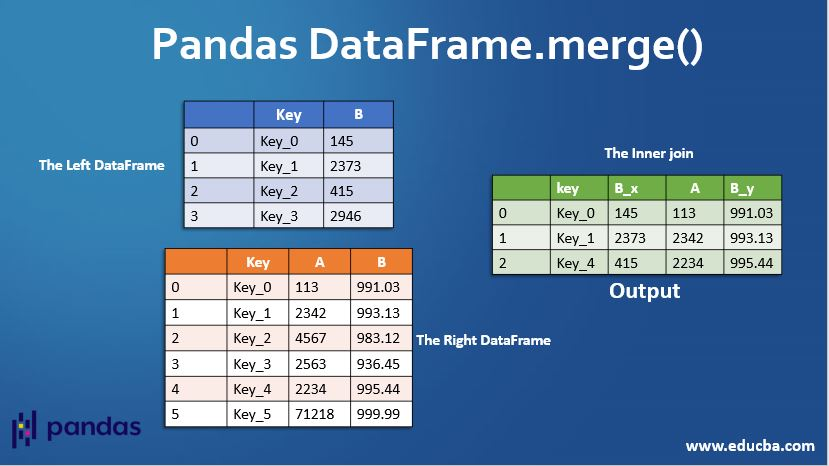

Đây là phương thức để join các bảng với nhau

In [144]:
data1 = {
  "date": [1, 2, 3, 4, 5],
  "name": ["ao", "quan", "giay", "ao", "giay"],
  "quantity": [18, 20, 22, 15, 6]
}

data2 = {
  "name": ["ao", "quan", 'giay'],
  "price": [5, 4, 3]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df1
df2

,date,name,quantity
0,1,ao,18
1,2,quan,20
2,3,giay,22
3,4,ao,15
4,5,giay,6


,name,price
0,ao,5
1,quan,4
2,giay,3


In [145]:
newdf = pd.merge(df1, df2, on="name")
newdf

,date,name,quantity,price
0,1,ao,18,5
1,4,ao,15,5
2,2,quan,20,4
3,3,giay,22,3
4,5,giay,6,3


## Ví dụ luyện tập

Vì dữ liệu của chúng ta đang ở 3 tập và rời rạc. Tôi sẽ tiến hành xử lí và đưa nó về một file cho dễ nhìn và dễ xử lí

In [180]:
# Load data from file csv
transactions = pd.read_csv('./data/Cafe-Transaction-Store.csv')
sold = pd.read_csv('./data/Cafe-Sell-Meta-Data.csv')
date_info = pd.read_csv('./data/Cafe-DateInfo.csv')

In [181]:
date_info['CALENDAR_DATE'] = pd.to_datetime(date_info['CALENDAR_DATE'])
transactions['CALENDAR_DATE'] = pd.to_datetime(transactions['CALENDAR_DATE'])

In [182]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,2012-01-01,2012,New Year,1,0,24.8,0
1,2012-01-02,2012,New Year,0,0,24.8,0
2,2012-01-03,2012,New Year,0,0,32.0,1
3,2012-01-04,2012,NaN,0,0,32.0,1
4,2012-01-05,2012,NaN,0,0,24.8,0
...,...,...,...,...,...,...,...
1343,2015-09-06,2015,NaN,1,0,75.2,1
1344,2015-09-07,2015,NaN,0,0,77.0,1
1345,2015-09-08,2015,NaN,0,0,73.4,1
1346,2015-09-09,2015,NaN,0,0,71.6,1


Dữ liệu transaction chứa biến SELL_ID làm tham chiếu nên cần có tất cả thông tin dữ liệu về SELL_ID ở trong tập Sell meta bổ sung vào. Do đó, phải chuyển đổi tập dữ liệu từ định dạng dài sang định dạng rộng. Điều này được thực hiện bằng cách chuẩn hóa nhị phân lại thông tin về thành phần của các mã hàng.

In [159]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


In [160]:
sold2 = pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum().drop(['SELL_ID'],axis=1).reset_index()
sold2

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,2051,1,0,1,0
2,2052,1,0,0,1
3,2053,1,1,1,0
4,3028,0,0,0,1
5,3055,0,1,0,0
6,3067,0,0,1,0


Sau đó, ta kết hợp 2 tập data sold và transactions theo cột SELL_ID

In [161]:
sold_trans_data = pd.merge(sold2, transactions, on = 'SELL_ID')
sold_trans_data

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY
0,1070,1,0,0,0,2012-01-01,15.50,46,0
1,1070,1,0,0,0,2012-01-02,15.50,70,0
2,1070,1,0,0,0,2012-01-03,15.50,62,0
3,1070,1,0,0,0,2012-01-04,15.50,88,0
4,1070,1,0,0,0,2012-01-05,15.50,104,0
...,...,...,...,...,...,...,...,...,...
5387,2053,1,1,1,0,2015-09-06,11.26,54,2
5388,2053,1,1,1,0,2015-09-07,11.26,50,2
5389,2053,1,1,1,0,2015-09-08,11.26,50,2
5390,2053,1,1,1,0,2015-09-09,11.26,54,2


Trong tập date_info, Ở cột HOLIDAY đang có giá trị NaN nên tui sẽ thêm giá trị 'No Holiday' cho nó nhé

In [183]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [184]:
date_info

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,2012-01-01,2012,New Year,1,0,24.8,0
1,2012-01-02,2012,New Year,0,0,24.8,0
2,2012-01-03,2012,New Year,0,0,32.0,1
3,2012-01-04,2012,No Holiday,0,0,32.0,1
4,2012-01-05,2012,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...,...
1343,2015-09-06,2015,No Holiday,1,0,75.2,1
1344,2015-09-07,2015,No Holiday,0,0,77.0,1
1345,2015-09-08,2015,No Holiday,0,0,73.4,1
1346,2015-09-09,2015,No Holiday,0,0,71.6,1


Ở tập date_info, tui muốn có thêm cột ngày tháng ra nữa để xem xét thêm sau nào. Vì vậy tui sẽ tách ngày tháng này ra các cột riêng

In [185]:
date_info.insert(2,'MONTH',date_info.CALENDAR_DATE.dt.month,allow_duplicates=True)
date_info.insert(3,'DAY',date_info.CALENDAR_DATE.dt.day, allow_duplicates=True)
date_info.insert(4,'DAYOFWEEK',date_info.CALENDAR_DATE.dt.day_name(), allow_duplicates=True)

In [186]:
date_info

,CALENDAR_DATE,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,2012-01-01,2012,1,1,Sunday,New Year,1,0,24.8,0
1,2012-01-02,2012,1,2,Monday,New Year,0,0,24.8,0
2,2012-01-03,2012,1,3,Tuesday,New Year,0,0,32.0,1
3,2012-01-04,2012,1,4,Wednesday,No Holiday,0,0,32.0,1
4,2012-01-05,2012,1,5,Thursday,No Holiday,0,0,24.8,0
...,...,...,...,...,...,...,...,...,...,...
1343,2015-09-06,2015,9,6,Sunday,No Holiday,1,0,75.2,1
1344,2015-09-07,2015,9,7,Monday,No Holiday,0,0,77.0,1
1345,2015-09-08,2015,9,8,Tuesday,No Holiday,0,0,73.4,1
1346,2015-09-09,2015,9,9,Wednesday,No Holiday,0,0,71.6,1


Giờ thì merge thêm cái date info vào

In [187]:
merge_data = pd.merge(sold_trans_data, date_info, on = 'CALENDAR_DATE')
merge_data

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY,YEAR,MONTH,DAY,DAYOFWEEK,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,1,0,0,0,2012-01-01,15.50,46,0,2012,1,1,Sunday,New Year,1,0,24.8,0
1,2051,1,0,1,0,2012-01-01,12.73,22,2,2012,1,1,Sunday,New Year,1,0,24.8,0
2,2052,1,0,0,1,2012-01-01,12.75,18,2,2012,1,1,Sunday,New Year,1,0,24.8,0
3,2053,1,1,1,0,2012-01-01,12.60,30,2,2012,1,1,Sunday,New Year,1,0,24.8,0
4,1070,1,0,0,0,2012-01-02,15.50,70,0,2012,1,2,Monday,New Year,0,0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,2053,1,1,1,0,2015-09-09,11.26,54,2,2015,9,9,Wednesday,No Holiday,0,0,71.6,1
5388,1070,1,0,0,0,2015-09-10,14.50,96,0,2015,9,10,Thursday,No Holiday,0,0,73.4,1
5389,2051,1,0,1,0,2015-09-10,12.19,30,2,2015,9,10,Thursday,No Holiday,0,0,73.4,1
5390,2052,1,0,0,1,2015-09-10,11.50,18,2,2015,9,10,Thursday,No Holiday,0,0,73.4,1


OK thế là ta đã gom 3 bộ về thành 1 bộ đầy đủ thông tin. Tuy có những cột có sai phương là 0 như cột BURGER không có mấy giá trị nhưng ta vẫn sẽ để cho nó đầy đủ nhé.

Kiểm tra lại và lưu nó vào thành file csv cho tiện sau này dùng nhé.

In [188]:
merge_data.shape
merge_data.to_csv('./data/merge_data.csv')

(5392, 18)